In [14]:
%% Initialization
clear ; close all; clc

In [15]:
%% Load Data
data = load('./data/ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

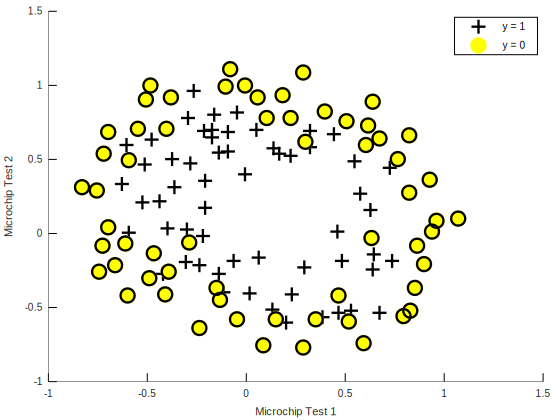

In [16]:
%% Plot the initialized data points
plotData(X, y);

% Put some labels
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;

In [17]:
% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled
X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Gradient at initial theta (zeros) - first five values only:\n');
fprintf(' %f \n', grad(1:5));

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros) - first five values only:
 0.008475 
 0.018788 
 0.000078 
 0.050345 
 0.011501 


In [18]:
% Compute and display cost and gradient with non-zero theta
test_theta = ones(size(X,2),1);
[cost, grad] = costFunctionReg(test_theta, X, y, lambda);

fprintf('\nCost at test theta: %f\n', cost);
fprintf('Gradient at test theta - first five values only:\n');
fprintf(' %f \n', grad(1:5));


Cost at test theta: 2.134848
Gradient at test theta - first five values only:
 0.346045 
 0.085081 
 0.118525 
 0.150592 
 0.015914 


In [19]:
% Regularization and Accuracies
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 1;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

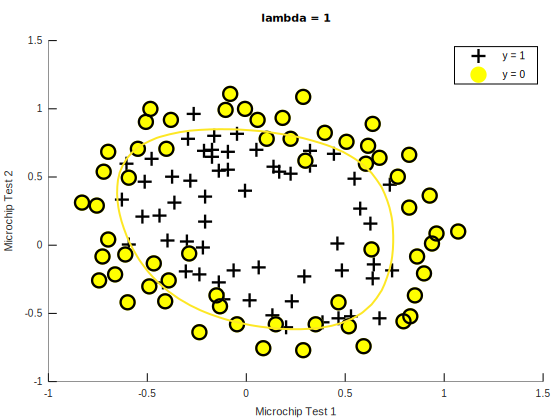

In [20]:
% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

In [22]:
% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

Train Accuracy: 83.050847
